# Accumulated Local Effects plots
This script serves to reproduce the plots which are shown in the paper.

## Importing the AccumulatedLocalEffects class

In [1]:
from ale import AccumulatedLocalEffects

## Importing the data sets

In [2]:
import numpy as np

# Training data sets
MI_LSD_SET03_X_train = np.load('data/MI-LSD-SET03_X_train.npy')
MI_LSD_SET03_y_train = np.load('data/MI-LSD-SET03_y_train.npy')

LSD_SET03_X_train = (MI_LSD_SET03_X_train[:, 0:16] + 
                     MI_LSD_SET03_X_train[:, 16:32] +
                     MI_LSD_SET03_X_train[:, 32:48] +
                     MI_LSD_SET03_X_train[:, 48:64])
LSD_SET03_y_train = MI_LSD_SET03_y_train

MI_LSD_SET03_sO2_X_train = np.load('data/MI-LSD-SET03-sO2_X_train.npy')
MI_LSD_SET03_sO2_y_train = np.load('data/MI-LSD-SET03-sO2_y_train.npy')

LSD_SET03_sO2_X_train = (MI_LSD_SET03_sO2_X_train[:, 0:16] + 
                         MI_LSD_SET03_sO2_X_train[:, 16:32] +
                         MI_LSD_SET03_sO2_X_train[:, 32:48] +
                         MI_LSD_SET03_sO2_X_train[:, 48:64])
LSD_SET03_sO2_y_train = MI_LSD_SET03_sO2_y_train

# Test data sets
MI_LSD_SET03_X_test = np.load('data/MI-LSD-SET03_X_test.npy')
MI_LSD_SET03_y_test = np.load('data/MI-LSD-SET03_y_test.npy')

MI_LSD_PHANTOMB_X_test = np.load('data/MI-LSD-PHANTOMB_X_test.npy')
MI_LSD_PHANTOMB_y_test = np.load('data/MI-LSD-PHANTOMB_y_test.npy')

MI_LSD_PHANTOMC_X_test = np.load('data/MI-LSD-PHANTOMC_X_test.npy')
MI_LSD_PHANTOMC_y_test = np.load('data/MI-LSD-PHANTOMC_y_test.npy')

LSD_SET03_X_test = (MI_LSD_SET03_X_test[:, 0:16] + 
                    MI_LSD_SET03_X_test[:, 16:32] +
                    MI_LSD_SET03_X_test[:, 32:48] +
                    MI_LSD_SET03_X_test[:, 48:64])
LSD_SET03_y_test = MI_LSD_SET03_y_test

LSD_PHANTOMB_X_test = (MI_LSD_PHANTOMB_X_test[:, 0:16] + 
                       MI_LSD_PHANTOMB_X_test[:, 16:32] +
                       MI_LSD_PHANTOMB_X_test[:, 32:48] +
                       MI_LSD_PHANTOMB_X_test[:, 48:64])
LSD_PHANTOMB_y_test = MI_LSD_PHANTOMB_y_test

LSD_PHANTOMC_X_test = (MI_LSD_PHANTOMC_X_test[:, 0:16] + 
                       MI_LSD_PHANTOMC_X_test[:, 16:32] +
                       MI_LSD_PHANTOMC_X_test[:, 32:48] +
                       MI_LSD_PHANTOMC_X_test[:, 48:64])
LSD_PHANTOMC_y_test = MI_LSD_PHANTOMC_y_test

MI_LSD_SET03_sO2_X_test = np.load('data/MI-LSD-SET03-sO2_X_test.npy')
MI_LSD_SET03_sO2_y_test = np.load('data/MI-LSD-SET03-sO2_y_test.npy')

LSD_SET03_sO2_X_test = (MI_LSD_SET03_sO2_X_test[:, 0:16] + 
                        MI_LSD_SET03_sO2_X_test[:, 16:32] +
                        MI_LSD_SET03_sO2_X_test[:, 32:48] +
                        MI_LSD_SET03_sO2_X_test[:, 48:64])
LSD_SET03_sO2_y_test = MI_LSD_SET03_sO2_y_test

## Initializing the LGBMRegressor

In [3]:
from lightgbm import LGBMRegressor

reg = LGBMRegressor(objective='cross_entropy',
                    n_estimators=300,
                    num_leaves=100,
                    seed=1)

## Instance of the AccumulatedLocalEffects class

In [4]:
ALE = AccumulatedLocalEffects(reg=reg,
                              filename='plots/LSD_SET03',
                              X_train=LSD_SET03_X_train,
                              y_train=LSD_SET03_y_train,
                              num_illum=1,
                              num_wlen=16,
                              num_subintervals=200,
                              num_x_values=50,
                              data_reduction=0.1) 

<hr style="border:2px solid black"> </hr>

## Learned spectral decoloring (LSD) for rCu

### Plotting the ALE functions

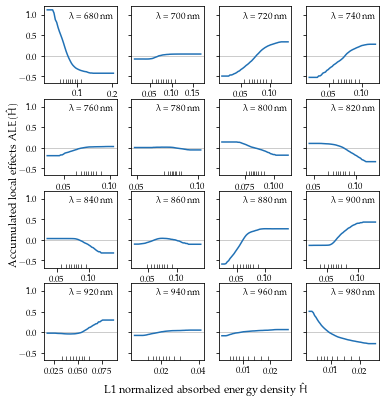

In [5]:
ALE.plot_ALE_function()

#### Sorted features by total variation

In [6]:
print(680 + ALE.feature_importance_indices()*20)

[780 700 940 960 760 860 800 840 920 820 900 980 740 720 880 680]


### Plotting the 'feature clipping' MAE-progressions
**SET03**

updated_min_ALE: [780 700 940 960 760 800 860 920 980 820 900 740 720 680 840 880]


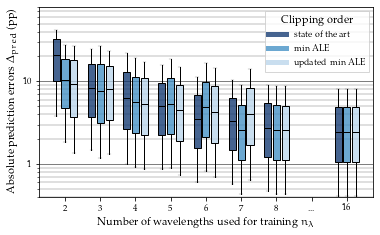

In [42]:
LSD_SET03_stats = ALE.plot_feature_clipping(LSD_SET03_X_test,
                                            LSD_SET03_y_test,
                                            clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                            n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [43]:
print(np.around(LSD_SET03_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[6.3 3.5 2.8 2.4]
[5.5 4.9 2.5 2.4]
[5.4 4.2 2.5 2.4]


90th percentile.

In [44]:
print(np.around(LSD_SET03_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[21.9 11.4  9.1  8.1]
[19.1 16.5  8.7  8.1]
[17.4 14.6  8.7  8.1]


**PHANTOMB**

updated_min_ALE: [780 700 940 960 760 800 860 920 980 820 900 740 720 680 840 880]


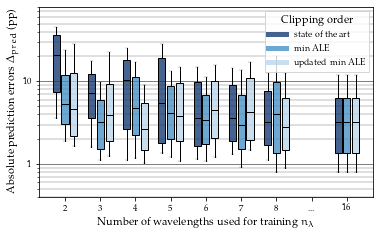

In [45]:
ALE.filename = 'plots/LSD_PHANTOMB'

LSD_PHANTOMB_stats = ALE.plot_feature_clipping(LSD_PHANTOMB_X_test, 
                                               LSD_PHANTOMB_y_test,
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [46]:
print(np.around(LSD_PHANTOMB_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMB_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMB_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[10.4  3.6  3.2  3.2]
[4.7 3.5 4.  3.2]
[2.7 4.5 2.8 3.2]


90th percentile.

In [47]:
print(np.around(LSD_PHANTOMB_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMB_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMB_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[25.4 15.1 12.7 11.8]
[17.2 11.4 20.2 11.8]
[ 9.  15.9 12.4 11.8]


**PHANTOMC**

updated_min_ALE: [780 700 940 960 760 800 860 920 980 820 900 740 720 680 840 880]


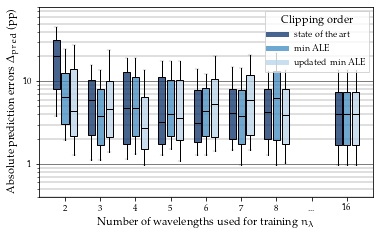

In [48]:
ALE.filename = 'plots/LSD_PHANTOMC'

LSD_PHANTOMC_stats = ALE.plot_feature_clipping(LSD_PHANTOMC_X_test, 
                                               LSD_PHANTOMC_y_test,
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [49]:
print(np.around(LSD_PHANTOMC_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMC_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMC_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[4.7 3.1 4.2 4. ]
[4.7 4.4 6.2 4. ]
[2.7 5.4 3.9 4. ]


90th percentile.

In [50]:
print(np.around(LSD_PHANTOMC_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMC_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_PHANTOMC_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[19.2 14.1 13.2 13.9]
[19.3 12.2 21.9 13.9]
[13.6 20.  13.6 13.9]


<hr style="border:2px solid black"> </hr>

## Learned spectral decoloring (LSD) for sO2

In [6]:
ALE.filename = 'plots/LSD_SET03_sO2'
ALE.X_train = LSD_SET03_sO2_X_train
ALE.y_train = LSD_SET03_sO2_y_train
ALE.num_illum = 1

### Plotting the ALE functions

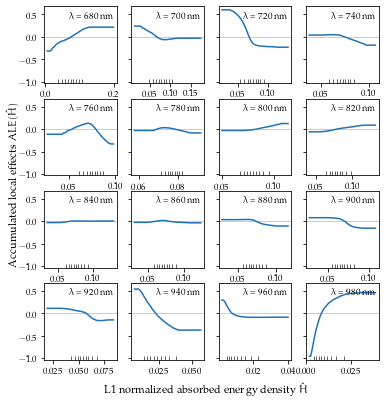

In [7]:
ALE.plot_ALE_function()

#### Sorted features by total variation

In [24]:
print(680 + ALE.feature_importance_indices()*20)

[840 860 820 880 800 780 900 740 920 700 960 680 760 720 940 980]


### Plotting the 'feature clipping' MAE-progressions
**SET03_sO2**

updated_min_ALE: [840 780 860 820 900 740 680 800 920 760 700 880 720 940 960 980]


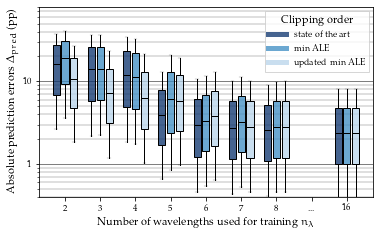

In [52]:
LSD_SET03_sO2_stats = ALE.plot_feature_clipping(LSD_SET03_sO2_X_test,
                                                LSD_SET03_sO2_y_test,
                                                clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [53]:
print(np.around(LSD_SET03_sO2_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_sO2_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_sO2_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[11.9  2.9  2.6  2.3]
[11.2  3.3  2.8  2.3]
[6.2 3.8 2.8 2.3]


90th percentile.

In [54]:
print(np.around(LSD_SET03_sO2_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_sO2_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(LSD_SET03_sO2_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[34.  10.6  9.   8.1]
[32.2 11.7  9.9  8.1]
[21.1 13.1 10.2  8.1]


<hr style="border:2px solid black"> </hr>

## Multiple illumination learned spectral decoloring (MI-LSD) for rCu

In [8]:
ALE.filename = 'plots/MI_LSD_SET03'
ALE.X_train = MI_LSD_SET03_X_train
ALE.y_train = MI_LSD_SET03_y_train
ALE.num_illum = 4

### Plotting the ALE functions

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


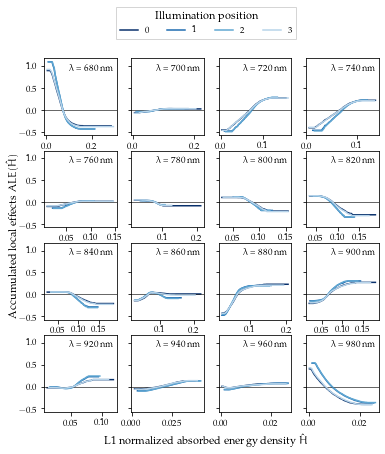

In [9]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

#### Sorted features by total variation

In [7]:
print(680 + ALE.feature_importance_indices(illum_pos=[0, 1, 2, 3])*20)

[700 780 960 760 940 920 860 840 800 820 900 740 880 720 980 680]


### Plotting the 'feature clipping' MAE-progressions
**SET03**

updated_min_ALE: [700 960 900 920 860 760 820 740 780 680 720 800 880 840 980 940]


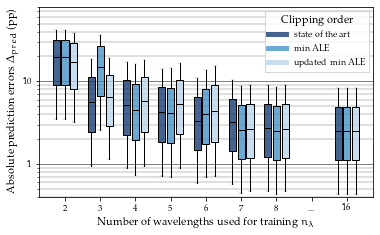

In [8]:
MI_LSD_SET03_stats = ALE.plot_feature_clipping(MI_LSD_SET03_X_test,
                                               MI_LSD_SET03_y_test,
                                               illum_pos=[0, 1, 2, 3],
                                               clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                               n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [33]:
print(np.around(MI_LSD_SET03_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[5.1 3.3 2.8 2.5]
[4.5 4.  2.5 2.5]
[5.8 4.3 2.7 2.5]


90th percentiles.

In [32]:
print(np.around(MI_LSD_SET03_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[17.2 11.   9.1  8.2]
[16.4 13.7  8.5  8.2]
[18.2 15.3  9.   8.2]


**PHANTOMB**

updated_min_ALE: [700 960 900 920 860 760 820 740 780 680 720 800 880 840 980 940]


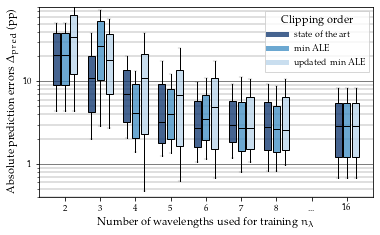

In [11]:
ALE.filename = 'plots/MI_LSD_PHANTOMB'

MI_LSD_PHANTOMB_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMB_X_test,
                                                  MI_LSD_PHANTOMB_y_test,
                                                  illum_pos=[0, 1, 2, 3],
                                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [31]:
print(np.around(MI_LSD_PHANTOMB_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMB_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMB_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[6.9 2.7 2.8 2.8]
[4.2 3.5 2.7 2.8]
[11.   4.9  2.6  2.8]


90th percentiles.

In [30]:
print(np.around(MI_LSD_PHANTOMB_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMB_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMB_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[20.4 10.   9.3  8.3]
[13.5 11.1  8.7  8.3]
[38.2 17.7 10.7  8.3]


**PHANTOMC**

updated_min_ALE: [700 960 900 920 860 760 820 740 780 680 720 800 880 840 980 940]


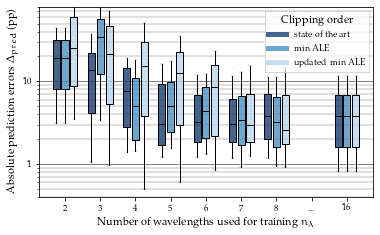

In [14]:
ALE.filename = 'plots/MI_LSD_PHANTOMC'

MI_LSD_PHANTOMC_stats = ALE.plot_feature_clipping(MI_LSD_PHANTOMC_X_test, 
                                                  MI_LSD_PHANTOMC_y_test,
                                                  illum_pos=[0, 1, 2, 3],
                                                  clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                  n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [29]:
print(np.around(MI_LSD_PHANTOMC_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMC_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMC_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[7.6 3.2 3.8 3.8]
[5.1 4.4 3.2 3.8]
[15.5  8.6  2.6  3.8]


90th percentile.

In [28]:
print(np.around(MI_LSD_PHANTOMC_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMC_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_PHANTOMC_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[19.3 11.9 11.3 11.5]
[18.  12.2 11.4 11.5]
[51.4 23.6 15.  11.5]


<hr style="border:2px solid black"> </hr>

## Multiple illumination learned spectral decoloring (MI-LSD) for sO2

In [10]:
ALE.filename = 'plots/MI_LSD_SET03_sO2'
ALE.X_train = MI_LSD_SET03_sO2_X_train
ALE.y_train = MI_LSD_SET03_sO2_y_train
ALE.num_illum = 4

### Plotting the ALE functions

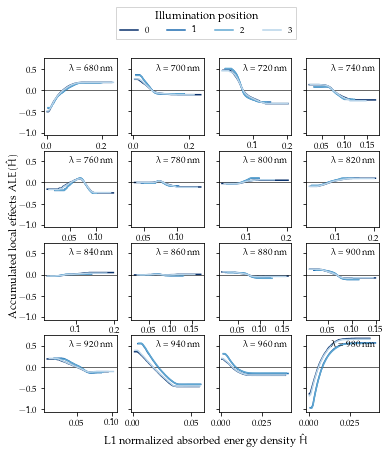

In [11]:
ALE.plot_ALE_function(illum_pos=[0, 1, 2, 3])

#### Sorted features by total variation

In [19]:
print(680 + ALE.feature_importance_indices(illum_pos=[0, 1, 2, 3])*20)

[860 840 800 880 780 820 900 740 920 700 960 760 680 720 940 980]


### Plotting the 'feature clipping' MAE-progressions
**SET03_sO2**

updated_min_ALE: [860 900 920 700 960 880 760 680 840 780 800 820 940 740 720 980]


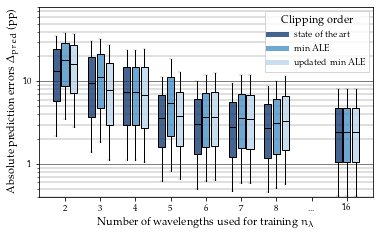

In [20]:
MI_LSD_SET03_sO2_stats = ALE.plot_feature_clipping(MI_LSD_SET03_sO2_X_test,
                                                   MI_LSD_SET03_sO2_y_test,
                                                   illum_pos=[0, 1, 2, 3],
                                                   clipping_order=['state_of_the_art', 'min_ALE', 'updated_min_ALE'],
                                                   n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])

Median absolute errors.

In [27]:
print(np.around(MI_LSD_SET03_sO2_stats['state_of_the_art'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_sO2_stats['min_ALE'][3][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_sO2_stats['updated_min_ALE'][3][[2, 4, 6, 7]],1))

[7.4 3.1 2.7 2.4]
[7.4 3.7 3.1 2.4]
[6.9 3.7 3.4 2.4]


90th percentile.

In [25]:
print(np.around(MI_LSD_SET03_sO2_stats['state_of_the_art'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_sO2_stats['min_ALE'][5][[2, 4, 6, 7]],1))
print(np.around(MI_LSD_SET03_sO2_stats['updated_min_ALE'][5][[2, 4, 6, 7]],1))

[24.1 10.2  8.8  8.1]
[24.1 12.1 10.1  8.1]
[24.6 12.6 11.5  8.1]


<hr style="border:2px solid black"> </hr>

## Other clipping orders

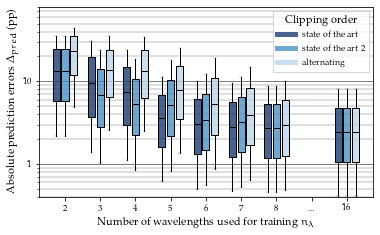

In [23]:
ALE.filename = 'plots/MI_LSD_SET03_sO2_alternatives'

MI_LSD_SET03_sO2_stats_2 = ALE.plot_feature_clipping(MI_LSD_SET03_sO2_X_test,
                                                     MI_LSD_SET03_sO2_y_test,
                                                     illum_pos=[0, 1, 2, 3],
                                                     clipping_order=['state_of_the_art', 'state_of_the_art_2', 'alternating'],
                                                     n_shown=[2, 3, 4, 5, 6, 7, 8, '...', 16])